[*********************100%%**********************]  1 of 1 completed


Open - Mean: 14455.850210450702 Median: 14999.0498046875 Mode: 11322.25
High - Mean: 14532.587536410841 Median: 15069.7998046875 Mode: 11058.0498046875
Low - Mean: 14349.471821175279 Median: 14890.650390625 Mode: 11614.5
Close - Mean: 14443.598379519693 Median: 14942.349609375 Mode: 10607.349609375
Before plotting


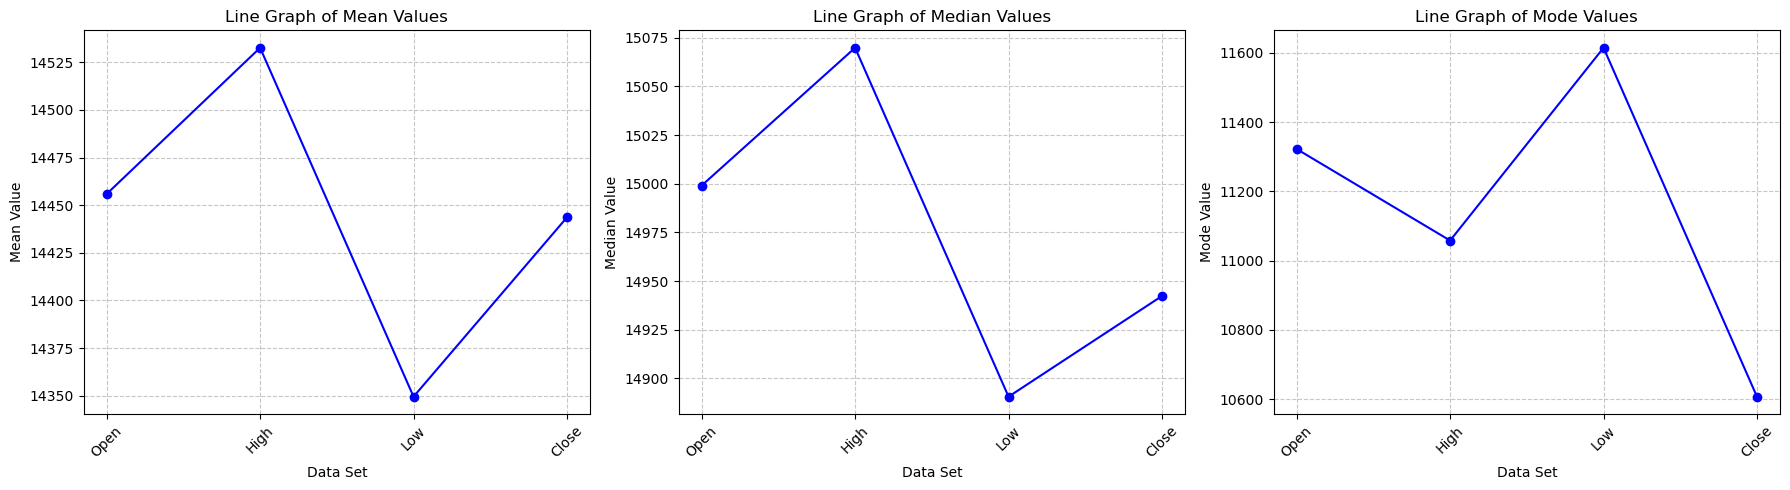

After plotting
Stock Daily Range:
0     79.400391
1    117.650391
2    143.099609
3     81.150391
4    162.000000
Name: Daily_Range, dtype: float64
Test Daily Range:
0    156.400391
1     86.300781
2    100.099609
3    109.250000
4    142.000000
Name: Daily Range, dtype: float64
Before plotting empty


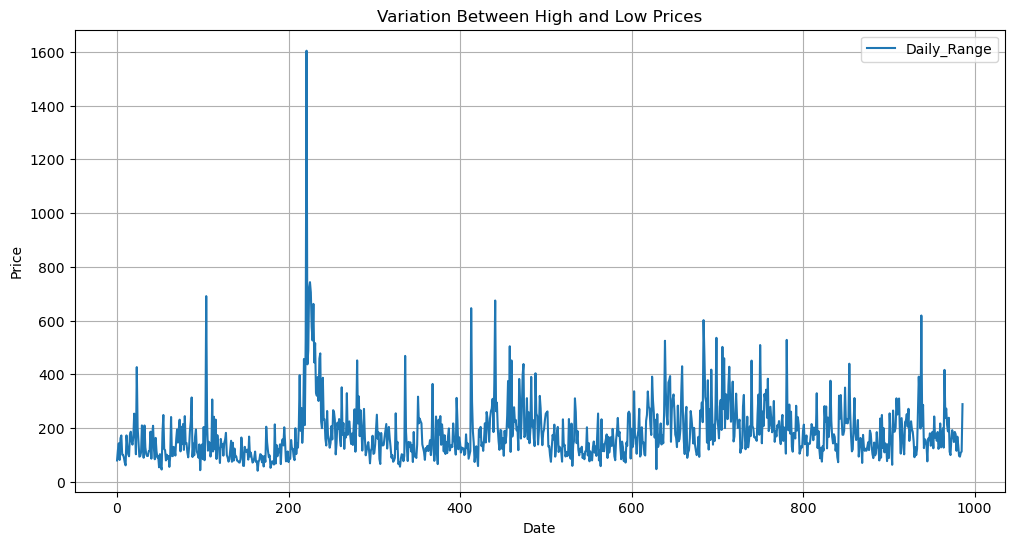

After plotting empty
                 Open      High       Low     Close  Adj Close    Volume  \
Open         1.000000  0.999590  0.999470  0.999013   0.999013 -0.691200   
High         0.999590  1.000000  0.999301  0.999551   0.999551 -0.687862   
Low          0.999470  0.999301  1.000000  0.999534   0.999534 -0.696829   
Close        0.999013  0.999551  0.999534  1.000000   1.000000 -0.691706   
Adj Close    0.999013  0.999551  0.999534  1.000000   1.000000 -0.691706   
Volume      -0.691200 -0.687862 -0.696829 -0.691706  -0.691706  1.000000   
Daily_Range  0.021755  0.037240 -0.000156  0.019006   0.019006  0.226877   
Volatility  -0.316820 -0.306892 -0.323932 -0.314434  -0.314434  0.337950   

             Daily_Range  Volatility  
Open            0.021755   -0.316820  
High            0.037240   -0.306892  
Low            -0.000156   -0.323932  
Close           0.019006   -0.314434  
Adj Close       0.019006   -0.314434  
Volume          0.226877    0.337950  
Daily_Range     1.000

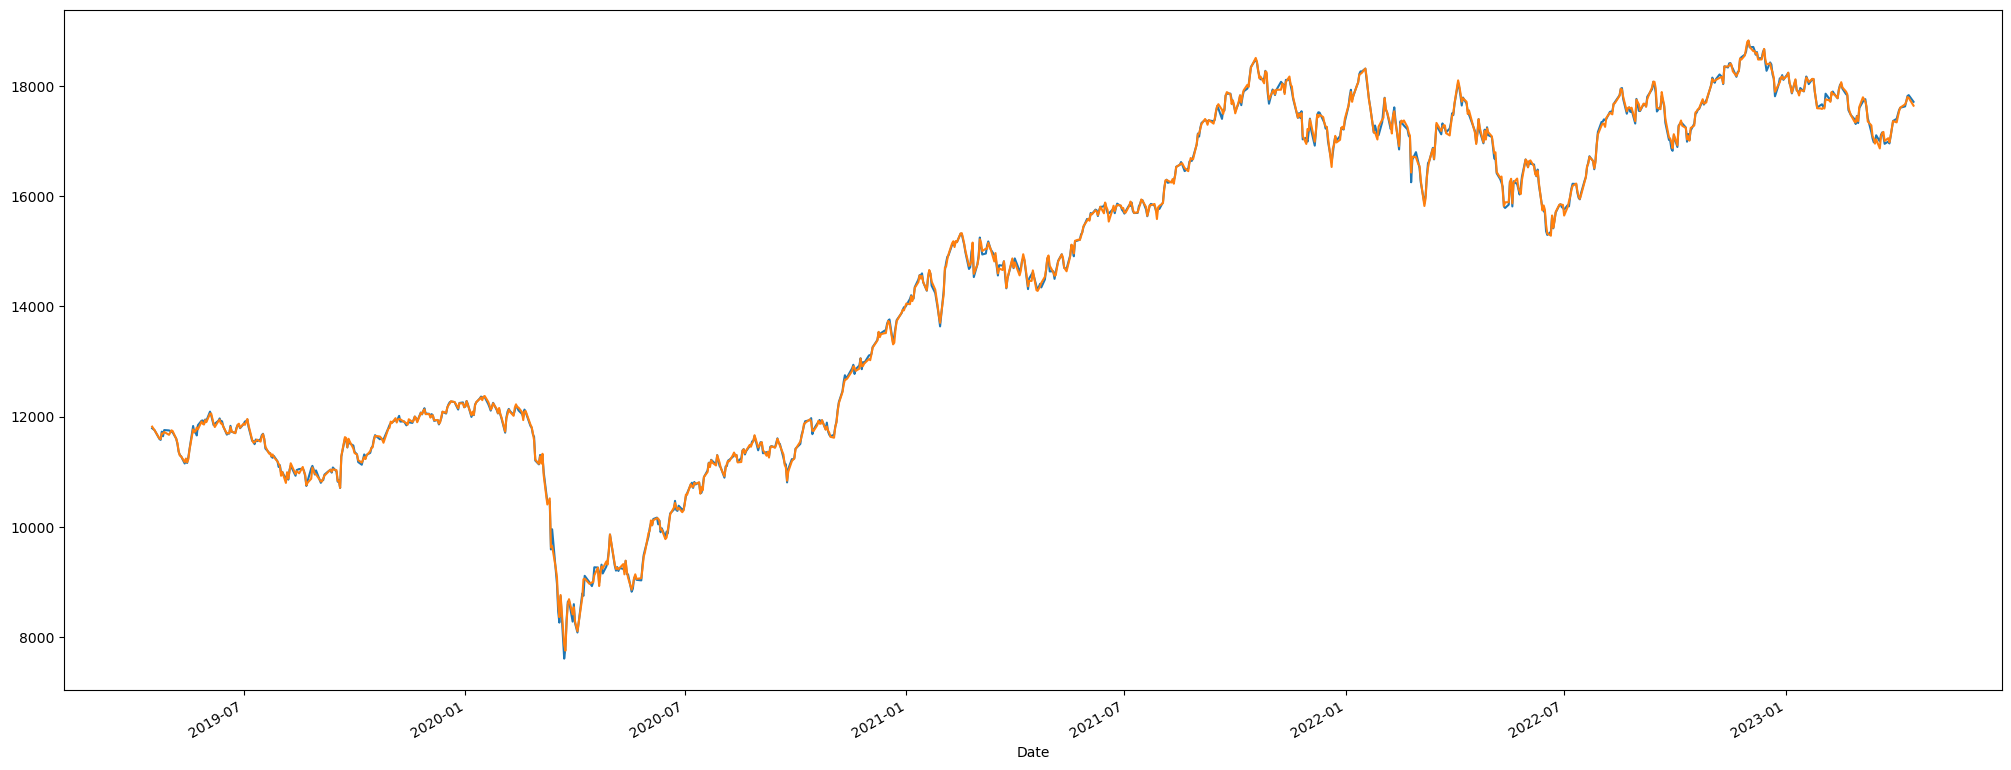

MAE: 34.75029133417818
MAPE: 0.2534915499866977


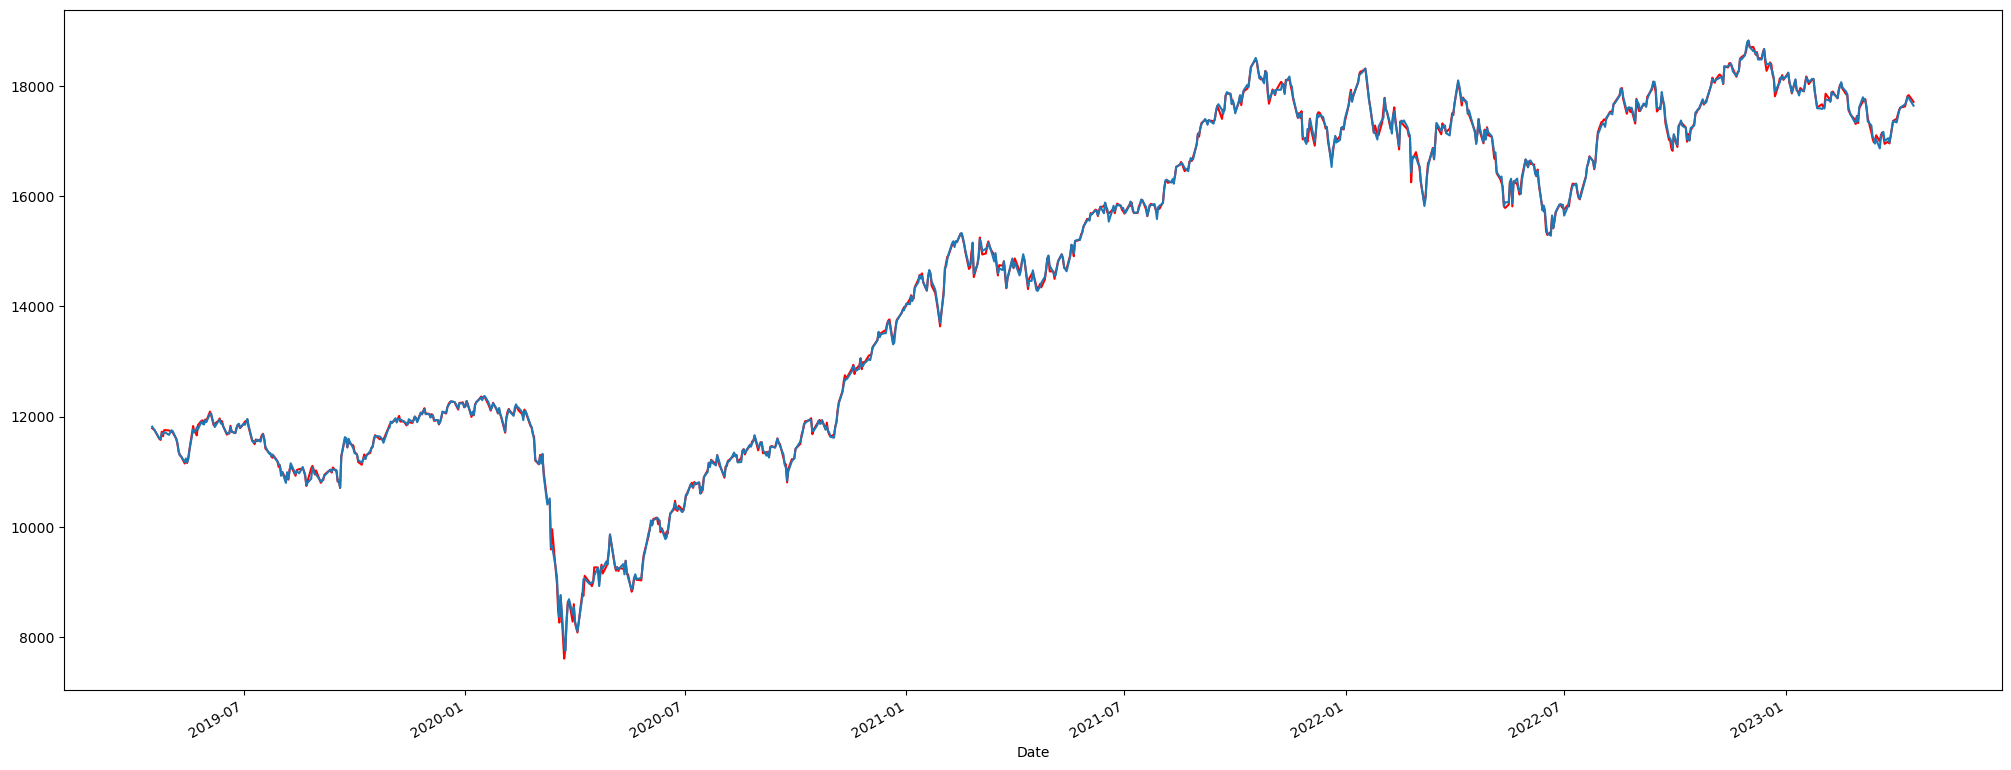

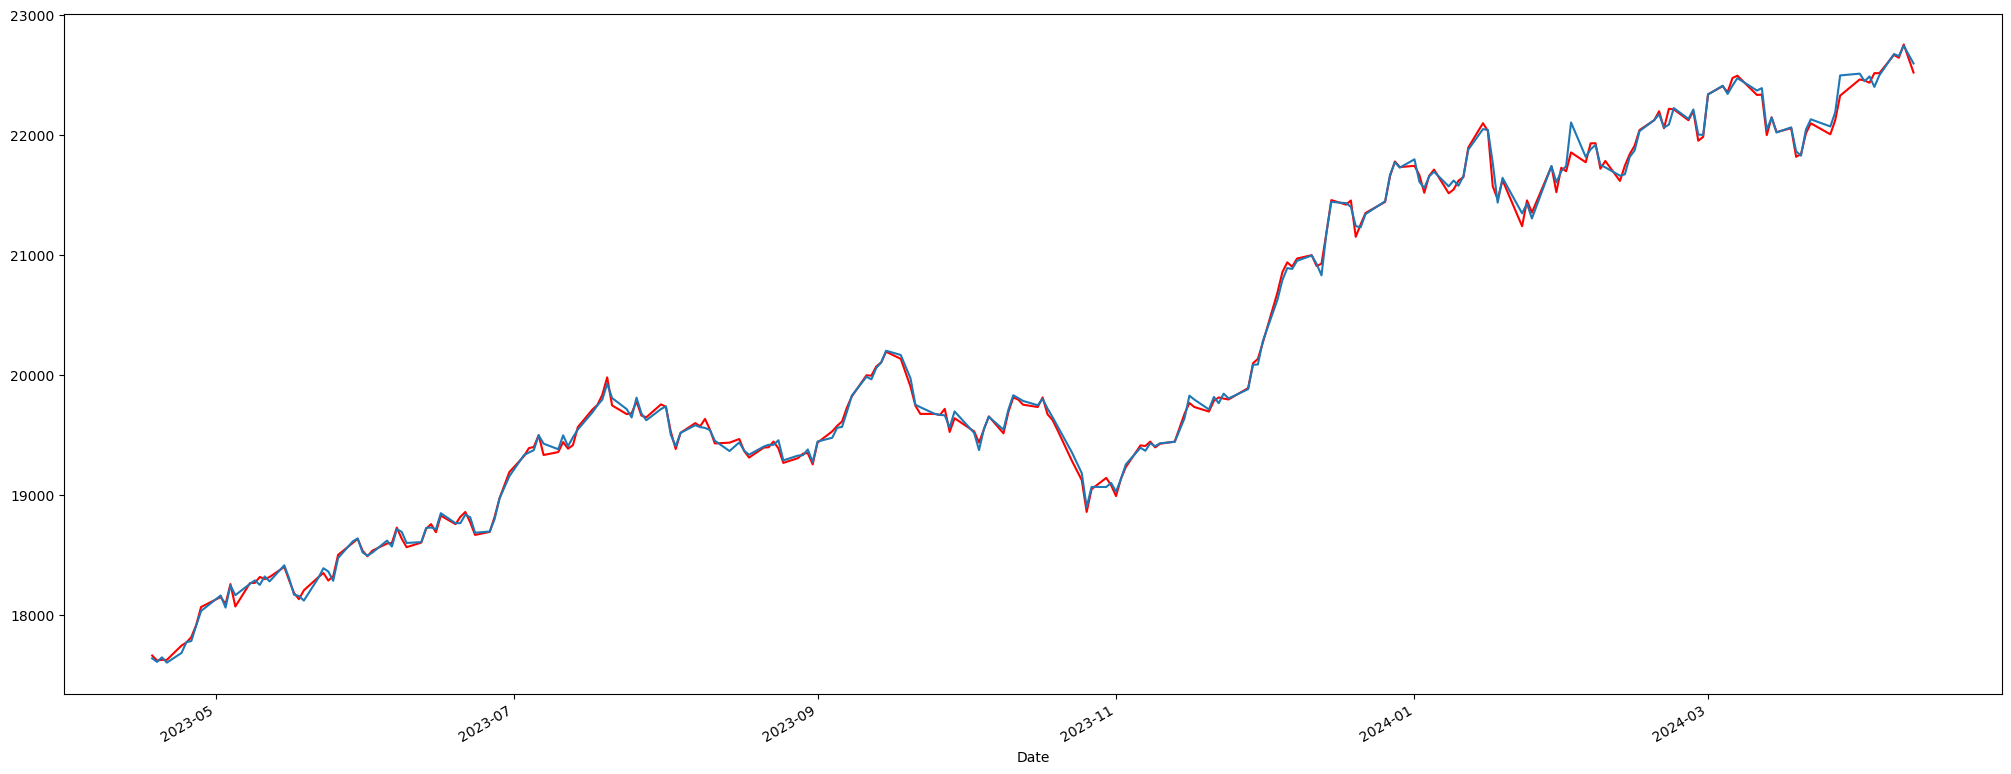

In [10]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# Define the stock ticker symbol
ticker = "^NSEI"

# Download the data (default is daily)
data = yf.download(ticker, start=datetime.now() - timedelta(days=365 * 5), end=datetime.now())

data = data.reset_index()
stock = data[:987]
test = data[987:]
stock = stock.reset_index(drop=True)
test = test.reset_index(drop=True)

# Fill missing values with mean
mean_open = test['Open'].mean()
test['Open'].fillna(value=mean_open, inplace=True)
mean_low = test['Low'].mean()
test['Low'].fillna(value=mean_low, inplace=True)

# Calculate mean, median, and mode
meanopen = stock["Open"].mean()
medianopen = stock["Open"].median()
modeopen = stock["Open"].mode()[0]

print("Open - Mean:", meanopen, "Median:", medianopen, "Mode:", modeopen)

meanhigh = stock["High"].mean()
medianhigh = stock["High"].median()
modehigh = stock["High"].mode()[0]

print("High - Mean:", meanhigh, "Median:", medianhigh, "Mode:", modehigh)

meanlow = stock["Low"].mean()
medianlow = stock["Low"].median()
modelow = stock["Low"].mode()[0]

print("Low - Mean:", meanlow, "Median:", medianlow, "Mode:", modelow)

meanclose = stock["Close"].mean()
medianclose = stock["Close"].median()
modeclose = stock["Close"].mode()[0]

print("Close - Mean:", meanclose, "Median:", medianclose, "Mode:", modeclose)

# Plot mean, median, and mode values
means = [meanopen, meanhigh, meanlow, meanclose]
medians = [medianopen, medianhigh, medianlow, medianclose]
modes = [modeopen, modehigh, modelow, modeclose]

print("Before plotting")
# Plot mean, median, and mode values
means = [meanopen, meanhigh, meanlow, meanclose]
medians = [medianopen, medianhigh, medianlow, medianclose]
modes = [modeopen, modehigh, modelow, modeclose]

plot_data = {'Measure': ['Open', 'High', 'Low', 'Close'], 'Mean': means, 'Median': medians, 'Mode': modes}
plot_df = pd.DataFrame(plot_data)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].plot(plot_df['Measure'], plot_df['Mean'], marker='o', linestyle='-', color='b')
axes[0].set_xticks(range(len(plot_df['Measure'])))
axes[0].set_xticklabels(plot_df['Measure'], rotation=45)
axes[0].set_xlabel('Data Set')
axes[0].set_ylabel('Mean Value')
axes[0].set_title('Line Graph of Mean Values')
axes[0].grid(True, linestyle='--', alpha=0.7)

axes[1].plot(plot_df['Measure'], plot_df['Median'], marker='o', linestyle='-', color='b')
axes[1].set_xticks(range(len(plot_df['Measure'])))
axes[1].set_xticklabels(plot_df['Measure'], rotation=45)
axes[1].set_xlabel('Data Set')
axes[1].set_ylabel('Median Value')
axes[1].set_title('Line Graph of Median Values')
axes[1].grid(True, linestyle='--', alpha=0.7)

axes[2].plot(plot_df['Measure'], plot_df['Mode'], marker='o', linestyle='-', color='b')
axes[2].set_xticks(range(len(plot_df['Measure'])))
axes[2].set_xticklabels(plot_df['Measure'], rotation=45)
axes[2].set_xlabel('Data Set')
axes[2].set_ylabel('Mode Value')
axes[2].set_title('Line Graph of Mode Values')
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("After plotting")

# Calculate and plot daily range
stock['Daily_Range'] = stock['High'] - stock['Low']
test['Daily Range'] = test['High'] - test['Low']
plot_cols = ['Daily_Range']

print("Stock Daily Range:")
print(stock['Daily_Range'].head())

print("Test Daily Range:")
print(test['Daily Range'].head())

print("Before plotting empty")
plt.figure(figsize=(12, 6))
stock['Daily_Range'].plot(kind='line', figsize=(12, 6))  # Use 'Daily_Range' instead of plot_cols
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Variation Between High and Low Prices')
plt.legend()
plt.grid(True)
plt.show()
print("After plotting empty")

# Convert date to datetime and set as index
stock['Date'] = pd.to_datetime(stock['Date'])
stock.set_index(['Date'], inplace=True)
test['Date'] = pd.to_datetime(test['Date'])
test.set_index(['Date'], inplace=True)

# Calculate volatility
stock['Volatility'] = (stock['High'] - stock['Low']) / (stock['Open'])
test['Volatility'] = (test['High'] - test['Low']) / test['Open']

# Shift volatility by 1 day
stock['Volatility'] = stock['Volatility'].shift(1)
test['Volatility'] = test['Volatility'].shift(1)

# Print correlation matrix
print(stock.corr())

# Perform ARIMA model selection
import warnings
warnings.filterwarnings("ignore")
import itertools
p = q = range(0, 8)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
store = {}
for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(stock.Close, order=param)
        model_arima_fit = model_arima.fit()
        store[param] = model_arima_fit.aic
    except:
        continue

sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
print("Best ARIMA model parameters:", min(sorted_dict, key=sorted_dict.get))

# Fit SARIMAX model
endog = stock['Close']
exog = sm.add_constant(stock[['Open', 'High', 'Low']])
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(3, 1, 5), seasonal_order=(1, 0, 0, 5))
model_fit = mod.fit()
print(model_fit.summary())

# Plot actual and fitted values
stock['Close'].plot(figsize=(25, 10))
model_fit.fittedvalues.plot()
plt.show()

# Predict in-sample
predict = model_fit.predict(start=0, end=len(stock) - 1, exog=sm.add_constant(stock[['Open', 'High', 'Low']]))
stock['Predicted'] = predict.values
stock.tail(5)

# Calculate residuals and error metrics
stock['Residual'] = abs(stock['Close'] - stock['Predicted'])
MAE = stock['Residual'].sum() / len(stock)
MAPE = (abs(stock['Residual']) / stock['Close']).sum() * 100 / len(stock)
print("MAE:", MAE)
print("MAPE:", MAPE)

# Plot actual vs predicted
stock['Close'].plot(figsize=(25, 10), color='red')
stock['Predicted'].plot()
plt.show()

# Predict out-of-sample
predict_final = model_fit.predict(start=len(stock), end=len(stock) + len(test) - 1,
                                  exog=sm.add_constant(test[['Open', 'High', 'Low']]))
test['Predicted'] = predict_final.values
test.tail(5)

# Plot actual vs predicted (out-of-sample)
test['Close'].plot(figsize=(25, 10), color='red')
test['Predicted'].plot()
plt.show()

def update_model(model_fit, new_observation):
    # Get the model parameters
    exog = model_fit.model.exog
    endog = model_fit.model.endog
    order = model_fit.model.order
    seasonal_order = model_fit.model.seasonal_order

    # Append the new observation to the endog and exog
    endog = endog.append(pd.Series([new_observation]))
    if exog is not None:
        exog = exog.append(model_fit.model.exog.iloc[-1:])

    # Fit a new SARIMAX model with the updated data
    updated_model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    updated_model_fit = updated_model.fit(disp=False)

    return updated_model_fit

Forecasted values for the next 10 days:
987    22486.346952
988    22508.532864
989    22452.606973
990    22492.886397
991    22403.895782
992    22496.970612
993    22674.295118
994    22654.803665
995    22745.563736
996    22596.371721
Name: predicted_mean, dtype: float64
Percentage increase between consecutive forecasted values:
[0.09866392606680942, -0.24846529193513406, 0.17939753775316747, -0.39563892593405864, 0.41544038064395733, 0.7882150380074529, -0.08596277404676024, 0.4006217501402915, -0.6559169778316752]


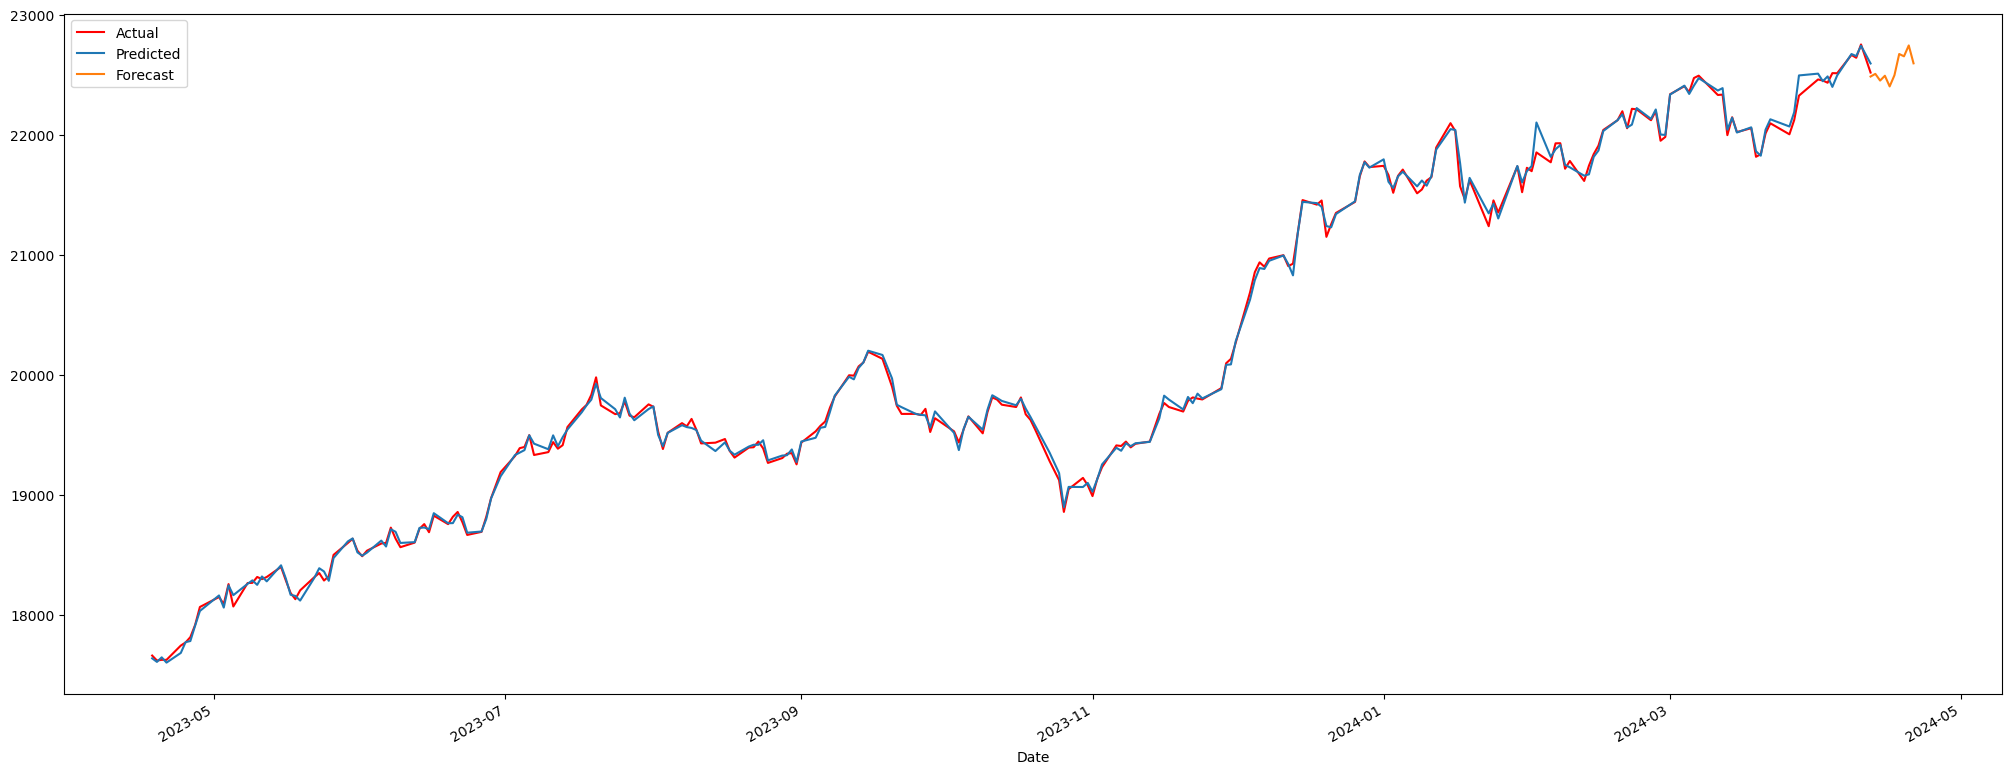

In [12]:
# Extend the time horizon for forecasting
forecast_steps = 10  # Change this to the desired number of future data points to forecast

# Create exogenous variables for forecasting
exog_forecast = sm.add_constant(test[['Open', 'High', 'Low']])

# Only select the last values for forecasting
exog_forecast = exog_forecast.tail(forecast_steps)

# Forecast future data points
forecast = model_fit.forecast(steps=forecast_steps, exog=exog_forecast)
print("Forecasted values for the next", forecast_steps, "days:")
print(forecast)

# Calculate the percentage increase between consecutive forecasted values
# Reset index of forecast series
forecast.reset_index(drop=True, inplace=True)

# Calculate the percentage increase between consecutive forecasted values
percentage_increase = [(forecast[i+1] - forecast[i]) / forecast[i] * 100 for i in range(len(forecast)-1)]
print("Percentage increase between consecutive forecasted values:")
print(percentage_increase)


# Convert the index of the forecast series to DatetimeIndex
forecast_index = pd.date_range(start=test.index[-1], periods=len(forecast))

# Plot actual vs predicted (out-of-sample) along with forecasted values
test['Close'].plot(figsize=(25, 10), color='red', label='Actual')
test['Predicted'].plot(label='Predicted')
plt.plot(forecast_index, forecast, label='Forecast')
plt.legend()
plt.show()
